In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams["figure.figsize"]=(10,6)
import plotly.express as px

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [4]:
data=pd.read_csv("train_ver2.csv",nrows=7e6)

data.info()

/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_1532/2748994526.py:1: DtypeWarning:

Columns (5,8,10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta             

In [5]:
#unique_ids

unique_id=pd.Series(data["ncodpers"].unique())
unique_id=unique_id.sample(n=130000)
data_unique_id=data[data.ncodpers.isin(unique_id)]

In [6]:
data_unique_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1007304 entries, 10 to 6999991
Data columns (total 48 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   fecha_dato             1007304 non-null  object 
 1   ncodpers               1007304 non-null  int64  
 2   ind_empleado           1003627 non-null  object 
 3   pais_residencia        1003627 non-null  object 
 4   sexo                   1003627 non-null  object 
 5   age                    1007304 non-null  object 
 6   fecha_alta             1003627 non-null  object 
 7   ind_nuevo              1003627 non-null  float64
 8   antiguedad             1007304 non-null  object 
 9   indrel                 1003627 non-null  float64
 10  ult_fec_cli_1t         1566 non-null     object 
 11  indrel_1mes            992582 non-null   object 
 12  tiprel_1mes            992582 non-null   object 
 13  indresi                1003627 non-null  object 
 14  indext                

In [7]:
data_unique_id['ncodpers'].count()

np.int64(1007304)

In [8]:
#change datatype 
data_unique_id['age']=pd.to_numeric(data_unique_id['age'],errors='coerce')
data_unique_id['antiguedad']=pd.to_numeric(data_unique_id['antiguedad'],errors='coerce') # cutomer seniority
data_unique_id['indrel_1mes']=pd.to_numeric(data_unique_id['indrel_1mes'],errors='coerce') # customer type 
data_unique_id['sexo'] = data_unique_id['sexo'].astype(str) # gender 
data_unique_id['ind_nuevo'] = data_unique_id['ind_nuevo'].astype(str) #New customer index
data_unique_id['ult_fec_cli_1t'] = pd.to_datetime(data_unique_id['ult_fec_cli_1t'],errors="coerce") #last date as primary customer
data_unique_id['indext'] = data_unique_id['indext'].astype(str) #foreginer index

/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_1532/2515218333.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_1532/2515218333.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_1532/2515218333.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [9]:
data_unique_id.isnull().sum()

fecha_dato                     0
ncodpers                       0
ind_empleado                3677
pais_residencia             3677
sexo                           0
age                         3677
fecha_alta                  3677
ind_nuevo                      0
antiguedad                  3677
indrel                      3677
ult_fec_cli_1t           1005738
indrel_1mes                14764
tiprel_1mes                14722
indresi                     3677
indext                         0
conyuemp                 1007151
canal_entrada              16827
indfall                     3677
tipodom                     3677
cod_prov                    8836
nomprov                     8836
ind_actividad_cliente       3677
renta                     178703
segmento                   16956
ind_ahor_fin_ult1              0
ind_aval_fin_ult1              0
ind_cco_fin_ult1               0
ind_cder_fin_ult1              0
ind_cno_fin_ult1               0
ind_ctju_fin_ult1              0
ind_ctma_f

In [10]:
#droping two column with most null values

df=data_unique_id.drop(['conyuemp','ult_fec_cli_1t'],axis=1)

In [11]:
unique_counts = df.nunique().to_frame(name='unique_count').T
unique_counts

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
unique_count,10,130000,4,72,3,113,6108,3,251,2,4,4,2,3,150,2,1,52,52,2,95271,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [12]:
#filling the income missing value using median method 

median_income_by_province=df.groupby(['nomprov'])['renta'].median()

df["renta"] = df["renta"].fillna(df["nomprov"].map(median_income_by_province))

In [13]:
df=df.dropna(axis=0)

In [14]:
df[df['antiguedad']<0]=0

In [15]:
df["fecha_dato"].unique()

array(['2015-01-28', 0, '2015-02-28', '2015-03-28', '2015-04-28',
       '2015-05-28', '2015-06-28', '2015-07-28', '2015-08-28',
       '2015-09-28', '2015-10-28'], dtype=object)

**Customer Demographics**

In [16]:
# Summary statistics
df['age'].describe()

count    982233.000000
mean         40.414961
std          17.186438
min           0.000000
25%          24.000000
50%          39.000000
75%          51.000000
max         126.000000
Name: age, dtype: float64

Text(0.5, 0, 'age')

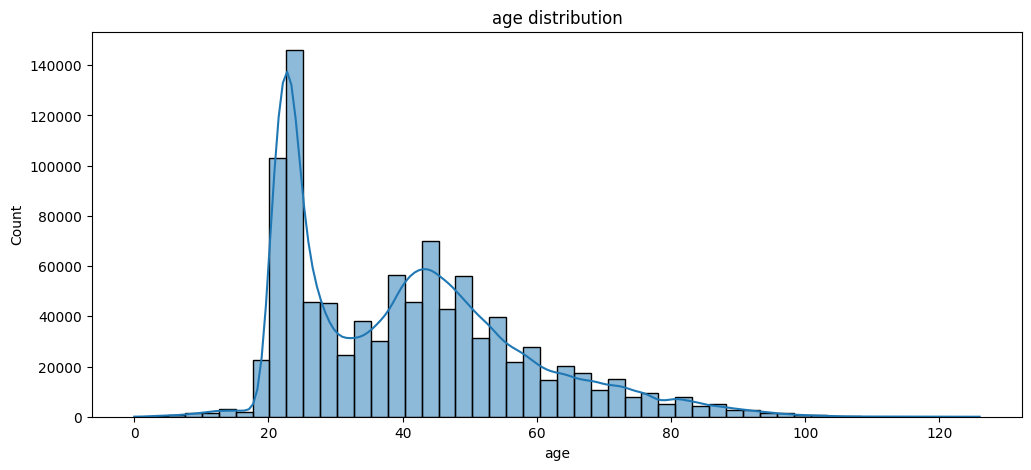

In [17]:
plt.figure(figsize=(12,5))
sns.histplot(df['age'],bins=50, kde=True)
plt.title("age distribution")
plt.xlabel("age")

**Customer base evolution**

In [26]:
#Monthly active user over fecha_dato

df['fecha_dato']=pd.to_datetime(df['fecha_dato'])

monthly_customers=df.groupby('fecha_dato')['ncodpers'].nunique().reset_index()

fig_1 = px.line(monthly_customers, x='fecha_dato', y='ncodpers',
              title="Monthly Growth in Number of Active Customers",
              labels={'fecha_dato': 'Date', 'ncodpers': 'Unique Customers'},markers=True)
fig_1.show()



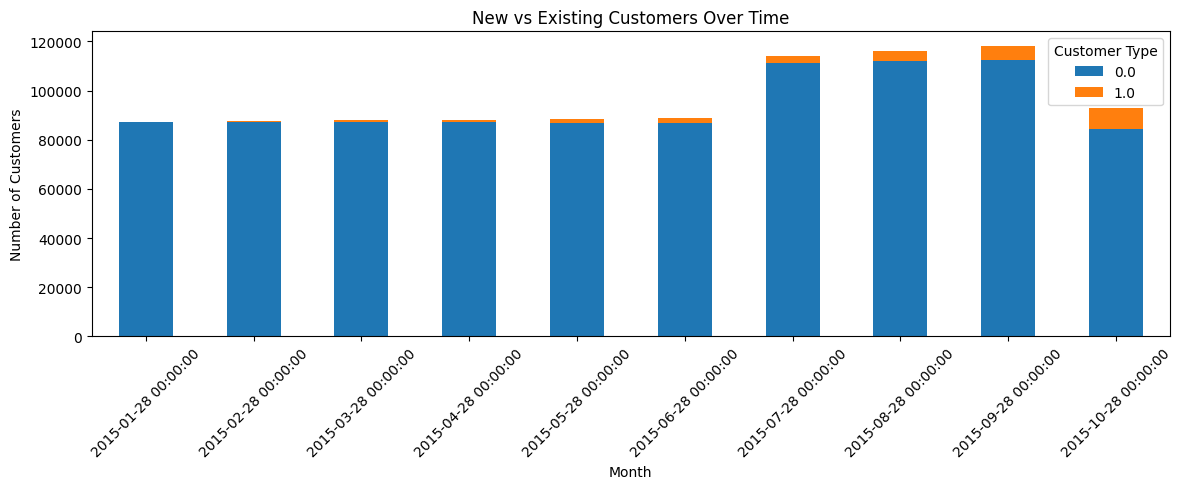

In [ ]:
#Count of new vs existing customers (ind_nuevo) over time

customer_status=df.groupby(['fecha_dato','ind_nuevo'])['ncodpers'].nunique().unstack()

customer_status.plot(kind='bar',stacked=True,figsize=(12,5))
plt.title("New vs Existing Customers Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

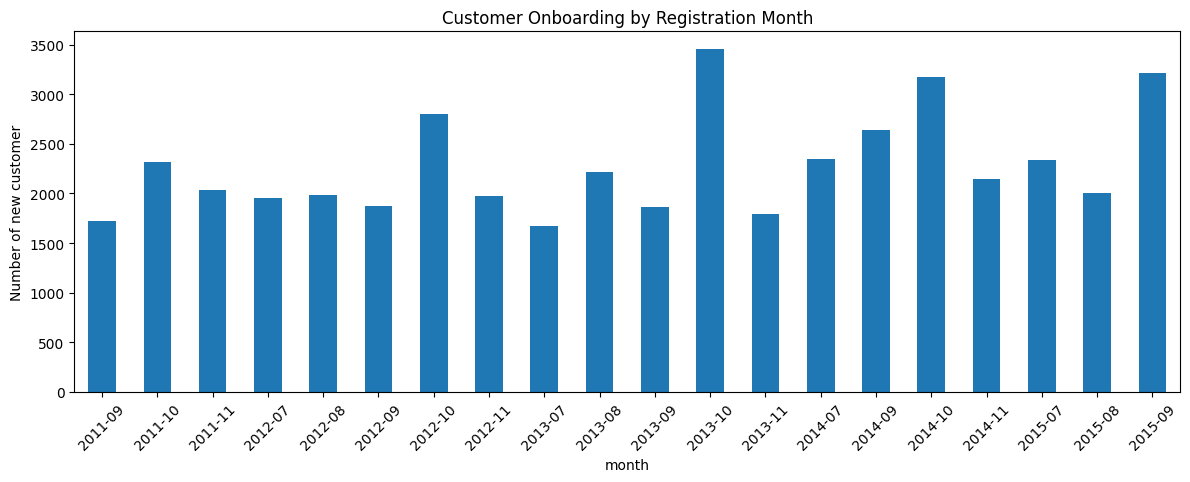

In [ ]:
#customers joined in each month, based on their registration date.

# Extract month-year of registration
df['fecha_alta']=pd.to_datetime(df['fecha_alta'])
df['alta_month'] = df['fecha_alta'].dt.to_period('M')
customer_joined =df.groupby(['alta_month'])['ncodpers'].nunique()

top_20_month=customer_joined.sort_values(ascending=False).head(20)
top_20_month=top_20_month.sort_index()


top_20_month.plot(kind='bar',figsize=(12,5))
plt.title("Customer Onboarding by Registration Month")
plt.xlabel('month')
plt.ylabel("Number of new customer")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show

In [27]:
product_cols = [col for col in df.columns if col.startswith('ind_') and col.endswith('_ult1')]

monthly_product_trend = df.groupby('fecha_dato')[product_cols].sum().reset_index()
monthly_product_trend = monthly_product_trend.melt(id_vars='fecha_dato', var_name='Product', value_name='Count')

fig = px.line(monthly_product_trend, x='fecha_dato', y='Count', color='Product',
              title="Monthly Trend of Product Holdings")
fig.show()



In [29]:
df_sorted = df.sort_values(by=['ncodpers', 'fecha_dato'])
for col in product_cols:
    df_sorted[f'{col}_prev'] = df_sorted.groupby('ncodpers')[col].shift(1)
    df_sorted[f'new_{col}'] = ((df_sorted[col] == 1) & (df_sorted[f'{col}_prev'] != 1)).astype(int)

new_product_cols = [f'new_{col}' for col in product_cols]
monthly_new_products = df_sorted.groupby('fecha_dato')[new_product_cols].sum().reset_index()
monthly_new_products = monthly_new_products.melt(id_vars='fecha_dato', var_name='Product', value_name='NewAdds')

fig = px.line(monthly_new_products, x='fecha_dato', y='NewAdds', color='Product',
              title="Monthly New Product Additions by Product Type")
fig.show()


In [39]:
#Monthly Product Drop Rates by Product Type

for col in product_cols:
    df_sorted[f'drop_{col}']=((df_sorted[col]==0 ) &(df_sorted[f'{col}_prev']==1 )).astype(int)

drop_prod_col=[f'drop_{col}' for col in product_cols]
monthly_dropped_column=df_sorted.groupby('fecha_dato')[drop_prod_col].sum().reset_index()
monthly_dropped = monthly_dropped_column.melt(id_vars='fecha_dato',var_name='Product',value_name='Dropped')
fig = px.line(monthly_dropped, x='fecha_dato', y='Dropped', color='Product',
              title="Monthly Product Drop Rates by Product Type",markers=True)
fig.show()

In [38]:
df['num_products'] = df[product_cols].sum(axis=1)

#Average Products Owned per Customer
avg_prod=df.groupby('fecha_dato')['num_products'].mean().reset_index()
fig = px.line(avg_prod, x='fecha_dato', y='num_products',
              title="Average Number of Products Owned per Customer",markers=True)
fig.show()

In [62]:
#Average Products Owned per Customer
avg_prod=df.groupby(['fecha_dato','segmento'])['num_products'].mean().reset_index()
fig = px.line(avg_prod, x='fecha_dato', y='num_products',color='segmento',
              title="Average Number of Products Owned per Customer",markers=True)
fig.show()

In [41]:
#Monthly Trends in Customer Segments
segment_trend = df.groupby(['fecha_dato', 'segmento'])['ncodpers'].nunique().reset_index()
fig = px.line(segment_trend, x='fecha_dato', y='ncodpers', color='segmento',
              title="Monthly Trends in Customer Segments",markers=True)
fig.show()


In [45]:
#Monthly Trends in Customer provience 
segment_trend = df.groupby(['fecha_dato', 'nomprov'])['ncodpers'].nunique().reset_index()
fig = px.line(segment_trend, x='fecha_dato', y='ncodpers', color='nomprov',
              title="Monthly Trends in Customer provience",markers=True)
fig.show()

In [ ]:
#Monthly Trends in Customer channel 
segment_trend = df.groupby(['fecha_dato', 'canal_entrada'])['ncodpers'].nunique().reset_index()
fig = px.line(segment_trend, x='fecha_dato', y='ncodpers', color='canal_entrada',
              title="Monthly Trends in Customer channel",markers=True)
fig.show()

In [ ]:
#Product Holding Rates by Age Group
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 45, 60, 80], labels=['18-30', '31-45', '46-60', '61-80'])
age_group_product_1 = df.groupby('age_group')[product_cols].mean().reset_index()
age_group_product = age_group_product_1.melt(id_vars='age_group', var_name='Product', value_name='OwnershipRate')

fig = px.bar(age_group_product, x='age_group', y='OwnershipRate', color='Product', barmode='group',
             title="Product Holding Rates by Age Group")
fig.show()


/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_1532/2671443793.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [60]:
segmento_product = df.groupby('segmento')[product_cols].mean().reset_index()
segmento_product = segmento_product.melt(id_vars='segmento', var_name='Product', value_name='OwnershipRate')

fig = px.bar(segmento_product, x='segmento', y='OwnershipRate', color='Product', barmode='group',
             title="Product Ownership by Income Level")
fig.show()

In [53]:
#Product Distribution by Income Level
df['renta']=df['renta'].astype(int)
df['income_group'] = pd.cut(df['renta'], bins=5).astype(str)
income_product = df.groupby('income_group')[product_cols].mean().reset_index()
income_product = income_product.melt(id_vars='income_group', var_name='Product', value_name='OwnershipRate')

fig = px.bar(income_product, x='income_group', y='OwnershipRate', color='Product', barmode='group',
             title="Product Ownership by Income Level")
fig.show()


In [ ]:
#Product Ownership Across Employment Status
employment_product = df.groupby('ind_empleado')[product_cols].mean().reset_index()
employment_product = employment_product.melt(id_vars='ind_empleado', var_name='Product', value_name='OwnershipRate')

fig = px.bar(employment_product, x='ind_empleado', y='OwnershipRate', color='Product', barmode='group',
             title="Product Ownership by Employment Type")
fig.show()


In [56]:
monthly_new_products_by_age = df_sorted.groupby('age')[new_product_cols].mean().reset_index()
monthly_new_products_by_age = monthly_new_products_by_age.melt(id_vars='age', var_name='Product', value_name='AddRate')

fig = px.line(monthly_new_products_by_age, x='age', y='AddRate', color='Product',
              title="Age vs. Likelihood of Adding Products")
fig.show()


In [64]:
monthly_new_products_by_segmento = df_sorted.groupby('segmento')[new_product_cols].mean().reset_index()
monthly_new_products_by_segmento = monthly_new_products_by_segmento.melt(id_vars='segmento', var_name='Product', value_name='AddRate')

fig = px.line(monthly_new_products_by_segmento, x='segmento', y='AddRate', color='Product',
              title="Age vs. Likelihood of Adding Products")
fig.show()

**Popularity based recommendation system**

In [ ]:
data_pop=pd.read_csv("train_ver2.csv")


/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_1833/1773149425.py:1: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data_pop=pd.read_csv("train_ver2.csv")


NameError: name 'data' is not defined

In [ ]:
data_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

In [38]:
product_cols = data_pop.columns[24:-2]
product_cols

Index(['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1'], dtype='object')

In [39]:
product_data=data_pop[product_cols]

In [40]:
Total_product_volume=product_data.sum(axis=0)

In [41]:
Total_product_volume

ind_ahor_fin_ult1       1396.0
ind_aval_fin_ult1        316.0
ind_cco_fin_ult1     8945588.0
ind_cder_fin_ult1       5376.0
ind_cno_fin_ult1     1103620.0
ind_ctju_fin_ult1     129297.0
ind_ctma_fin_ult1     132742.0
ind_ctop_fin_ult1    1760616.0
ind_ctpp_fin_ult1     591008.0
ind_deco_fin_ult1      24275.0
ind_deme_fin_ult1      22668.0
ind_dela_fin_ult1     586381.0
ind_ecue_fin_ult1    1129227.0
ind_fond_fin_ult1     252284.0
ind_hip_fin_ult1       80336.0
ind_plan_fin_ult1     125159.0
ind_pres_fin_ult1      35857.0
ind_reca_fin_ult1     716980.0
ind_tjcr_fin_ult1     605786.0
ind_valo_fin_ult1     349475.0
ind_viv_fin_ult1       52511.0
ind_nomina_ult1       745961.0
dtype: float64

In [42]:
Total_product_frequency = Total_product_volume/ len(data_pop)

In [43]:
Total_product_frequency 

ind_ahor_fin_ult1    0.000102
ind_aval_fin_ult1    0.000023
ind_cco_fin_ult1     0.655484
ind_cder_fin_ult1    0.000394
ind_cno_fin_ult1     0.080867
ind_ctju_fin_ult1    0.009474
ind_ctma_fin_ult1    0.009727
ind_ctop_fin_ult1    0.129008
ind_ctpp_fin_ult1    0.043306
ind_deco_fin_ult1    0.001779
ind_deme_fin_ult1    0.001661
ind_dela_fin_ult1    0.042967
ind_ecue_fin_ult1    0.082744
ind_fond_fin_ult1    0.018486
ind_hip_fin_ult1     0.005887
ind_plan_fin_ult1    0.009171
ind_pres_fin_ult1    0.002627
ind_reca_fin_ult1    0.052536
ind_tjcr_fin_ult1    0.044389
ind_valo_fin_ult1    0.025608
ind_viv_fin_ult1     0.003848
ind_nomina_ult1      0.054660
dtype: float64

In [44]:
popular_df = pd.DataFrame({
    'product': product_cols,
    'product_volume': Total_product_volume.values,
    'product_frequency': Total_product_frequency.round(2).values
})

In [45]:
popular_product=popular_df.sort_values(by='product_frequency',ascending=False).reset_index(drop=True)

In [47]:
popular_product.head(5)

,product,product_volume,product_frequency
0,ind_cco_fin_ult1,8945588.0,0.66
1,ind_ctop_fin_ult1,1760616.0,0.13
2,ind_cno_fin_ult1,1103620.0,0.08
3,ind_ecue_fin_ult1,1129227.0,0.08
4,ind_nomina_ult1,745961.0,0.05


From the simple recommendation, we can conclude the top 3 hot selling products are Current Accounts (ind_cco_fin_ult1), Direct Debit (ind_recibo_ult1) and Particular Account (ind_ctop_fin_ult1). The new customers could be shown the list when he/she opened account.

**Time decay Adjustment**

In [59]:
from math import exp

popular_time = data_pop.iloc[:,[0,1,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]]
popular_time['fecha_dato']=pd.to_datetime(popular_time['fecha_dato'])


/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_1833/1343144219.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_time['fecha_dato']=pd.to_datetime(popular_time['fecha_dato'])


In [60]:
popular_time.head()

,fecha_dato,ncodpers,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1
0,2015-01-28,1375586,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,2015-01-28,1050611,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,2015-01-28,1050612,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,2015-01-28,1050613,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0
4,2015-01-28,1050614,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [61]:
popular_time.drop(['ncodpers'], axis = 1, inplace = True)

/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_1833/2489757892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_time.drop(['ncodpers'], axis = 1, inplace = True)


In [62]:
popular_time.head()

,fecha_dato,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1
0,2015-01-28,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,2015-01-28,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,2015-01-28,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,2015-01-28,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0
4,2015-01-28,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [63]:
popular_time_group = popular_time.groupby(['fecha_dato'], as_index = False).sum()

In [65]:
# Reshape the data 
popular_time_group = pd.melt(popular_time_group, id_vars='fecha_dato', var_name='product_name', value_name='product_volume')

In [66]:
popular_time_group

,fecha_dato,product_name,product_volume
0,2015-01-28,ind_ahor_fin_ult1,88.0
1,2015-02-28,ind_ahor_fin_ult1,89.0
2,2015-03-28,ind_ahor_fin_ult1,89.0
3,2015-04-28,ind_ahor_fin_ult1,87.0
4,2015-05-28,ind_ahor_fin_ult1,85.0
5,2015-06-28,ind_ahor_fin_ult1,83.0
6,2015-07-28,ind_ahor_fin_ult1,82.0
7,2015-08-28,ind_ahor_fin_ult1,82.0
8,2015-09-28,ind_ahor_fin_ult1,81.0
9,2015-10-28,ind_ahor_fin_ult1,81.0


In [67]:
def time_decay(t, decay_rate):
    return exp(-decay_rate * t)

In [70]:
popular_time_group['days_elapsed'] = (popular_time_group['fecha_dato'].max() - popular_time_group['fecha_dato']).dt.days


In [71]:
popular_time_group

,fecha_dato,product_name,product_volume,month_elapsed,days_elapsed
0,2015-01-28,ind_ahor_fin_ult1,88.0,486,486
1,2015-02-28,ind_ahor_fin_ult1,89.0,455,455
2,2015-03-28,ind_ahor_fin_ult1,89.0,427,427
3,2015-04-28,ind_ahor_fin_ult1,87.0,396,396
4,2015-05-28,ind_ahor_fin_ult1,85.0,366,366
5,2015-06-28,ind_ahor_fin_ult1,83.0,335,335
6,2015-07-28,ind_ahor_fin_ult1,82.0,305,305
7,2015-08-28,ind_ahor_fin_ult1,82.0,274,274
8,2015-09-28,ind_ahor_fin_ult1,81.0,243,243
9,2015-10-28,ind_ahor_fin_ult1,81.0,213,213


In [72]:
decay_rate = 0.001
popular_time_group['weight'] = popular_time_group['days_elapsed'].apply(lambda x: time_decay(x, decay_rate))


In [74]:
popular_time_group['weighted_volume'] = popular_time_group['product_volume'] * popular_time_group['weight']


In [76]:
product_scores = popular_time_group.groupby('product_name', as_index=False)['weighted_volume'].sum()

In [79]:
recommendations = product_scores.sort_values('weighted_volume', ascending=False)
recommendations.head(5)

,product_name,weighted_volume
2,ind_cco_fin_ult1,7.151619e+06
7,ind_ctop_fin_ult1,1.392299e+06
12,ind_ecue_fin_ult1,9.038044e+05
4,ind_cno_fin_ult1,8.830533e+05
15,ind_nomina_ult1,5.952627e+05


In [82]:
total_weighted = recommendations['weighted_volume'].sum()
recommendations['normalized_score'] = recommendations['weighted_volume'] / total_weighted


In [83]:
recommendations.head(5)

,product_name,weighted_volume,normalized_score
2,ind_cco_fin_ult1,7.151619e+06,0.515683
7,ind_ctop_fin_ult1,1.392299e+06,0.100395
12,ind_ecue_fin_ult1,9.038044e+05,0.065171
4,ind_cno_fin_ult1,8.830533e+05,0.063674
15,ind_nomina_ult1,5.952627e+05,0.042923
